# Illustrate retrospective cohort
We create a gridspec of five rows and four columns. 

The first row will be the legend for the second and third rows. 

The second row will be clinically relevant (ranked as either Investigate Actionability or Putatively Actionable) somatic variants and copy number alterations in metastatic melanoma and mCRPC; the left side will be a bar plot showing patients observed with an alteration by the Molecular Oncology Almanac and both by the Molecular Oncology Almanac and PHIAL-TARGET. The right side will be bar charts of the most common feature by cohort.

The third row will be the same as above but will show fusions, germline variants, aneuploidy, tumor mutational burden, and mutational signatures. The rightside of the row will likewise show the most common features. 

The fourth row will feature bar plots of showing patients with a relationship associated with therapeutic sensitivity by evidence for metastatic melanoma (left) and mCRPC (right). 

In [1]:
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys
sys.path.append('../../common/')
import settings
settings.set_arial_as_font()

from settings import Colors
tableau10 = Colors.tableau10
comut_colors = Colors.comut_figure
grey = Colors.grey
greengradient = Colors.greengradient

redact_germline = True

%matplotlib inline

## Load data

In [2]:
df = pd.read_csv('retrospective.actionability.txt', sep='\t')
df.head()

,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
0,MEL-IPI_Pat04,CDKN2A/B.Deletion,Putatively Actionable,Investigate Actionability,2,MEL,Preclinical,NaN,NaN,NaN,Somatic copy number,CDKN2A/B Del
1,MEL-IPI_Pat07,CDKN2A/B.Deletion,Putatively Actionable,NaN,1,MEL,Preclinical,NaN,NaN,NaN,Somatic copy number,CDKN2A/B Del
2,MEL-IPI_Pat100,CDKN2A/B.Deletion,Putatively Actionable,Investigate Actionability,2,MEL,Preclinical,NaN,NaN,NaN,Somatic copy number,CDKN2A/B Del
3,MEL-IPI_Pat106,CDKN2A/B.Deletion,Putatively Actionable,Investigate Actionability,2,MEL,Preclinical,NaN,NaN,NaN,Somatic copy number,CDKN2A/B Del
4,MEL-IPI_Pat119,CDKN2A/B.Deletion,Putatively Actionable,Investigate Actionability,2,MEL,Preclinical,NaN,NaN,NaN,Somatic copy number,CDKN2A/B Del


In [3]:
vanallen_sorted = pd.read_csv('retrospective.pivoted.vanallen.txt', sep='\t', index_col='feature_type')
vanallen_sorted.fillna(0, inplace=True)

In [4]:
robinson_sorted = pd.read_csv('retrospective.pivoted.robinson.txt', sep='\t', index_col='feature_type')
robinson_sorted.fillna(0, inplace=True)

In [5]:
vanallen_counts_sens = pd.read_csv('retrospective.sensitivity-by-evidence.vanallen.txt', sep='\t')
vanallen_counts_sens

,evidence,counts,fraction,label
0,FDA-Approved,63,0.56,FDA
1,Guideline,12,0.11,Guideline
2,Clinical trial,1,0.01,Clinical trial
3,Clinical evidence,19,0.17,Clinical evidence
4,Preclinical,11,0.10,Preclinical
5,Inferential,1,0.01,Inferential
6,WT,3,0.04,No event associated with therapeutic sensitivity


In [6]:
robinson_counts_sens = pd.read_csv('retrospective.sensitivity-by-evidence.robinson.txt', sep='\t')
robinson_counts_sens

,evidence,counts,fraction,label
0,FDA-Approved,13,0.09,FDA
1,Guideline,87,0.57,Guideline
2,Clinical trial,7,0.05,Clinical trial
3,Clinical evidence,2,0.01,Clinical evidence
4,Preclinical,31,0.21,Preclinical
5,Inferential,2,0.01,Inferential
6,WT,7,0.07,No event associated with therapeutic sensitivity


In [7]:
vanallen_feature_type_counts = pd.read_csv('retrospective.feature-type-counts.vanallen.txt', sep='\t', index_col='method')
vanallen_feature_type_counts

,Somatic variant,Somatic copy number,Rearrangement,Germline variant,Tumor mutational burden,Mutational signature,Aneuploidy
method,,,,,,,
PHIAL/TARGET,167.0,98.0,0.0,0.0,0.0,0.0,0.0
Molecular Oncology Almanac,584.0,138.0,19.0,0.0,43.0,5.0,62.0


In [8]:
robinson_feature_type_counts = pd.read_csv('retrospective.feature-type-counts.robinson.txt', sep='\t', index_col='method')
robinson_feature_type_counts

,Somatic variant,Somatic copy number,Rearrangement,Germline variant,Tumor mutational burden,Mutational signature,Aneuploidy
method,,,,,,,
PHIAL/TARGET,108.0,214.0,0.0,0.0,0.0,0.0,0.0
Molecular Oncology Almanac,226.0,227.0,108.0,0.0,4.0,35.0,75.0


## Figure 2

In [9]:
def format_bar(ax):
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(False)
    
    plt.tick_params(axis = 'both', which = 'both',
                top = False, bottom = False, right = False, left = False, 
                labeltop = False, labelbottom = True, labelright = False, labelleft = True)
    
    plt.xticks(fontsize=14, rotation=45, ha='right')
    plt.yticks(fontsize=14)

def format_figure(ax, ylabels_boolean, label):
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_linewidth(2)
        ax.spines[spine].set_linestyle('--')
        
    plt.tick_params(axis='both', which='both',
                   top=False, bottom=False, right=False, left=False,
                   labeltop=False, labelbottom=False, labelright=False, labelleft=ylabels_boolean)
    
    if ylabels_boolean:
        plt.yticks([0, 1.5, 1], fontsize=9)
        ax.set_yticklabels([label], fontsize=20, minor=False)

def plot_bar(values, x_pos, y_pos, ymax, ylabel=''):
    ax = plt.subplot(gs[x_pos, y_pos])
    format_bar(ax)
    
    values.plot.bar(color=tableau10['blue'], width=0.9)
    plt.xticks(fontsize=14, rotation=45, ha='right')
    plt.yticks(fontsize=14)
    plt.ylim([0, 85])
    if ylabel != '':
        plt.ylabel(ylabel, fontsize=15)
        
def plot_comut(dataframe, grid, column, cmap, norm, ylabels=False, row_plus=0):
    for dtype_label in dataframe.index:
        dtype_idx = dataframe.index.get_loc(dtype_label)
        ax = plt.subplot(grid[dtype_idx + row_plus, column])
        format_figure(ax, ylabels, dtype_label)
        
        array = dataframe.loc[dtype_label, :].astype(int).values
        expanded = np.expand_dims(array, axis=0)
        plt.imshow(expanded, aspect='auto', interpolation='nearest', cmap=cmap, norm=norm)

def remove_spines(ax):
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(False)

def remove_ticks():
    plt.tick_params(axis = 'both', which = 'both',
                top = False, bottom = False, right = False, left = False, 
                labeltop = False, labelbottom = False, labelright = False, labelleft = False)

/Users/brendan/opt/miniconda3/envs/moalmanac-paper/lib/python3.7/site-packages/matplotlib/figure.py:2314: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  warnings.warn("Calling figure.constrained_layout, but figure not "


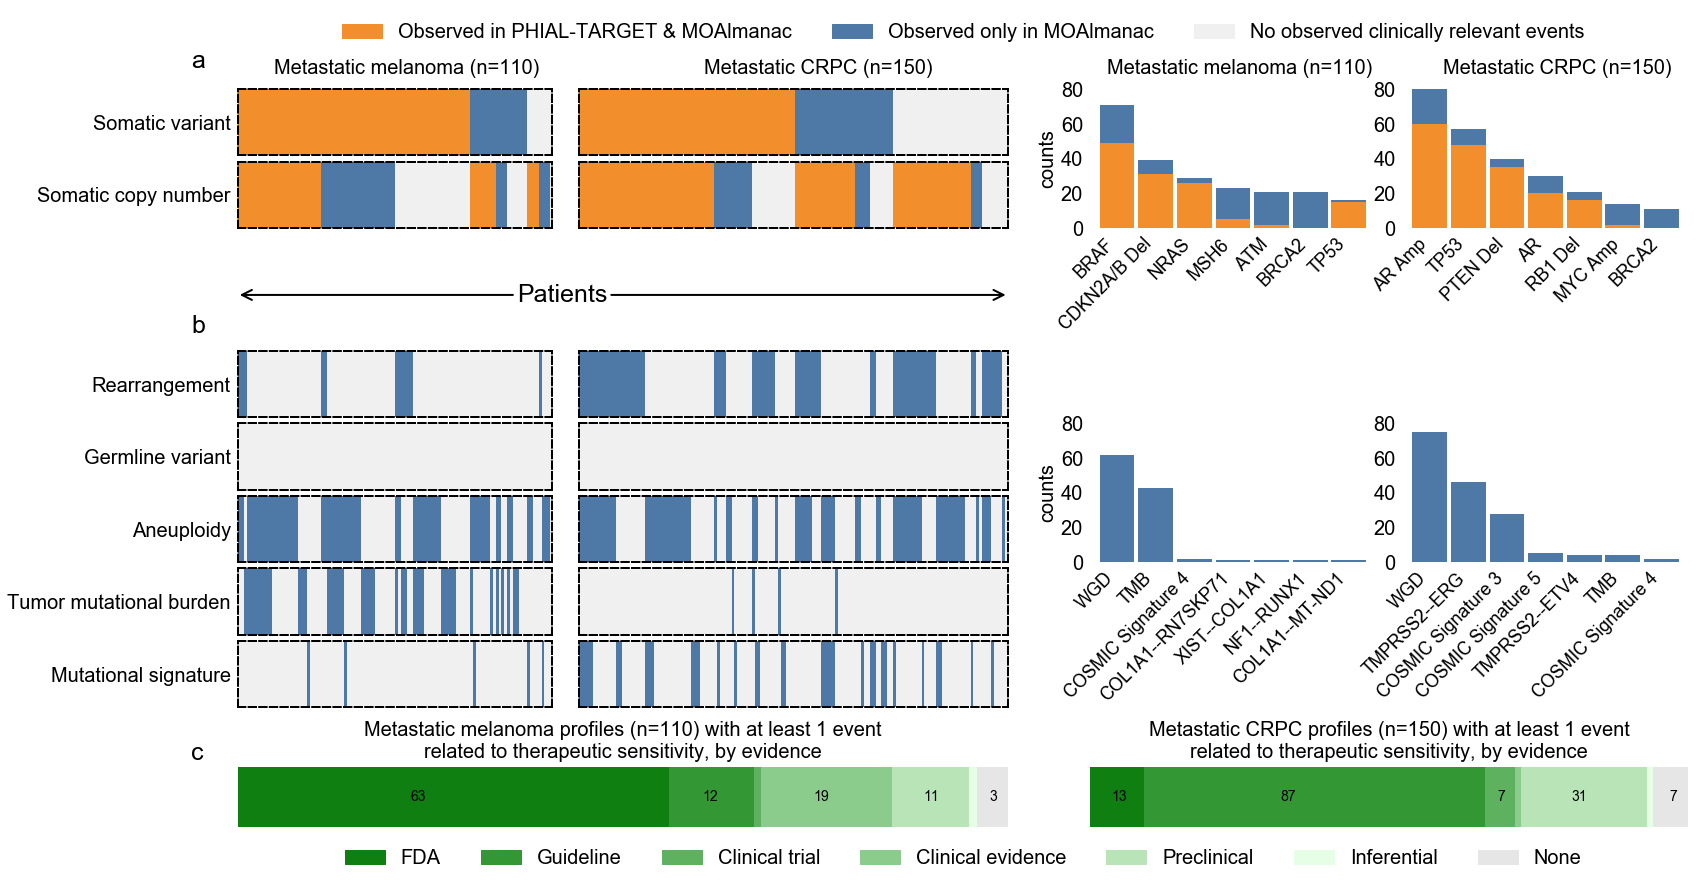

In [10]:
font_size = 20
font_size_sm = 18
font_size_lg = 25

fig = plt.figure(figsize=(26, 16), constrained_layout=True)
gs = gridspec.GridSpec(13, 5, 
                       width_ratios = [11, 15, 1, 10, 10], 
                       height_ratios = [2, 1, 3, 3, 5, 3, 3, 3, 3, 3, 2, 3, 2])
gs.update(hspace=0.7, wspace=0.1)

# Row 0, legend
labels = ['Observed in PHIAL-TARGET & MOAlmanac',
          'Observed only in MOAlmanac',
          'No observed clinically relevant events']
legend_colors = [Colors.tableau10['orange'], 
                 Colors.tableau10['blue'], 
                 Colors.tableau10['white']]
ax_legend_main = plt.subplot(gs[0, 0:5])
patches = [mpatches.Patch(color=color, label=label) 
           for label, color in zip(labels, legend_colors)]
plt.legend(patches, labels, loc='center', frameon=False, fontsize=font_size, ncol=3)

remove_spines(ax_legend_main)
remove_ticks()

# Row 1-8, columns 1 and 2. Somatic variants and copy number alterations per patient
gs.update(hspace = 0.1, wspace=0.1)
cmap = colors.ListedColormap(comut_colors)
bounds = [0, 1, 2, 3]
norm = colors.BoundaryNorm(bounds, cmap.N)

first_rows = ['Somatic variant', 'Somatic copy number']
second_rows = ['Rearrangement', 'Germline variant', 'Aneuploidy', 'Tumor mutational burden', 'Mutational signature']
plot_comut(vanallen_sorted.loc[first_rows, :], gs, 0, cmap, norm, ylabels=True, row_plus=2)
plot_comut(vanallen_sorted.loc[second_rows, :], gs, 0, cmap, norm, ylabels=True, row_plus=5)
plt.figtext(0.215, 0.83, 'Metastatic melanoma (n=110)', va="center", ha="center", fontsize=font_size)

plot_comut(robinson_sorted.loc[first_rows, :], gs, 1, cmap, norm, ylabels=False, row_plus=2)
plot_comut(robinson_sorted.loc[second_rows, :], gs, 1, cmap, norm, ylabels=False, row_plus=5)
plt.figtext(0.435, 0.83, 'Metastatic CRPC (n=150)', va="center", ha="center", fontsize=font_size)

plt.figtext(0.66, 0.83, 'Metastatic melanoma (n=110)', va="center", ha="center", fontsize=font_size)
plt.figtext(0.83, 0.83, 'Metastatic CRPC (n=150)', va="center", ha="center", fontsize=font_size)

## Patient x label
ax_x_label = plt.subplot(gs[4, 0:2])
plt.xlim([0, 1])

ax_x_label.annotate('', (0, 0.45), (0.36, 0.45), ha='right', va='center', size=25,
                   arrowprops=dict(arrowstyle='->', fc='k', ec='k', linewidth=2))
ax_x_label.annotate('Patients', (1, 0.45), (0.48, 0.45), ha='right', va='center', size=25,
                   arrowprops=dict(arrowstyle='->', fc='k', ec='k', linewidth=2))

remove_spines(ax_x_label)
remove_ticks()

# Rows 1-8, columns 3 and 4. Common molecular features
display_n = 7

idx_v = df['cohort'].eq('MEL')
idx_r = df['cohort'].eq('SU2C')
idx_almanac = df['almanac_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])
idx_phial = df['phial_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])
idx_both = idx_almanac & idx_phial

idx_std = df['feature_type'].isin(['Somatic variant', 'Somatic copy number'])
idx_nstd = ~idx_std

v_std_almanac = df[idx_v & idx_std & idx_almanac]['feature_str_simple'].value_counts().head(display_n)
v_std_both = df[idx_v & idx_std & idx_both]['feature_str_simple'].value_counts().reindex(v_std_almanac.index).fillna(0)
v_std_almanac_only = v_std_almanac.subtract(v_std_both)

v_nstd = df[idx_v & idx_nstd & idx_almanac]['feature_str_simple'].value_counts().head(display_n)

r_std_almanac = df[idx_r & idx_std & idx_almanac]['feature_str_simple'].value_counts().head(display_n)
r_std_both = df[idx_r & idx_std & idx_both]['feature_str_simple'].value_counts().reindex(r_std_almanac.index).fillna(0)
r_std_almanac_only = r_std_almanac.subtract(r_std_both)

r_nstd = df[idx_r & idx_nstd & idx_almanac]['feature_str_simple'].value_counts().head(display_n)

## Melanoma, first
ax_mel_feature_1 = plt.subplot(gs[2:4, 3])
format_bar(ax_mel_feature_1)
p1 = v_std_both.plot.bar(color=tableau10['orange'], width=0.9)
p2 = v_std_almanac_only.plot.bar(color=tableau10['blue'], width=0.9, bottom=v_std_both)

plt.xticks(fontsize=font_size_sm, rotation=45, ha='right')
plt.yticks(fontsize=font_size)
plt.ylim([0, 80])
plt.ylabel('counts', fontsize=font_size)

## Prostate, first
ax_prostate_feature_1 = plt.subplot(gs[2:4, 4])
format_bar(ax_prostate_feature_1)
p1 = r_std_both.plot.bar(color=tableau10['orange'], width=0.9)
p2 = r_std_almanac_only.plot.bar(color=tableau10['blue'], width=0.9, bottom=r_std_both)

plt.xticks(fontsize=font_size_sm, rotation=45, ha='right')
plt.yticks(fontsize=font_size)
plt.ylim([0, 80])

# Mel, second
ax_melanoma_feature_2 = plt.subplot(gs[6:8, 3])
format_bar(ax_melanoma_feature_2)

p3 = v_nstd.plot.bar(color=tableau10['blue'], width=0.9)
plt.xticks(fontsize=font_size_sm, rotation=45, ha='right')
plt.yticks(fontsize=font_size)
plt.ylim([0, 80])
plt.ylabel('counts', fontsize=font_size)

# Prostate, second
ax_prostate_feature_2 = plt.subplot(gs[6:8, 4])
format_bar(ax_prostate_feature_2)
p4 = r_nstd.plot.bar(color=tableau10['blue'], width=0.9)
plt.xticks(fontsize=font_size_sm, rotation=45, ha='right')
plt.yticks(fontsize=font_size)
plt.ylim([0, 80])

# Sensitivity by evidence, melanoma

evidence_gradient = [
    greengradient[5], 
    greengradient[4], 
    greengradient[3], 
    greengradient[2],
    greengradient[1], 
    greengradient[0], 
    grey[3]
]

gradient_colors = {}
gradient_colors[0] = greengradient[5]
gradient_colors[1] = greengradient[4]
gradient_colors[2] = greengradient[3]
gradient_colors[3] = greengradient[2]
gradient_colors[4] = greengradient[1]
gradient_colors[5] = greengradient[0]
gradient_colors[6] = grey[3]

evidence_labels = ['FDA', 'Guideline', 'Clinical trial', 'Clinical evidence', 
                   'Preclinical', 'Inferential', 
                   'None']

ax_melanoma_sensitive = plt.subplot(gs[11, 0:2])

total = 0
for index in vanallen_counts_sens.index:
    counts = vanallen_counts_sens.loc[index, 'counts']
    fraction = vanallen_counts_sens.loc[index, 'fraction']
    label = vanallen_counts_sens.loc[index, 'label']
    if fraction != 0.0:
        plt.barh(0.5, round(fraction, 2), color=gradient_colors[index], align='center', left=total, label=label)
        if fraction != 0.01:
            plt.text(total + 2*fraction/5, 0.45, counts, fontsize=14)
    total+=round(fraction, 2)

plt.xlim([0, 1])

remove_spines(ax_melanoma_sensitive)
remove_ticks()

title = 'Metastatic melanoma profiles (n=110) with at least 1 event\nrelated to therapeutic sensitivity, by evidence'
plt.title(title, fontsize=font_size)

# Sensitivity by evidence, prostate

ax_prostate_sensitive = plt.subplot(gs[11, 3:5])

total = 0
for index in robinson_counts_sens.index:
    counts = robinson_counts_sens.loc[index, 'counts']
    fraction = robinson_counts_sens.loc[index, 'fraction']
    label = robinson_counts_sens.loc[index, 'label']
    if fraction != 0.0:
        plt.barh(0.5, round(fraction, 2), color=gradient_colors[index], align='center', left=total, label=label)
        if fraction != 0.01:
            plt.text(total + 2*fraction/5, 0.45, counts, fontsize=14)
    total+=round(fraction, 2)

plt.xlim([0, 1])
    
remove_spines(ax_prostate_sensitive)
remove_ticks()

title = 'Metastatic CRPC profiles (n=150) with at least 1 event\nrelated to therapeutic sensitivity, by evidence'
plt.title(title, fontsize=font_size)

# Legend for by sensitivity
ax_legend_main = plt.subplot(gs[12, :])
patches = [mpatches.Patch(color=color, label=label) 
           for label, color in zip(evidence_labels, evidence_gradient)]
plt.legend(patches, evidence_labels, loc='center', frameon=False, fontsize=font_size, ncol=7)

remove_spines(ax_legend_main)
remove_ticks()

fig_label_x = 0.1
fig_label_y_a = 0.83
fig_label_y_b = 0.60
fig_label_y_c = 0.23

plt.figtext(fig_label_x, fig_label_y_a, 'a', fontsize=font_size_lg)
plt.figtext(fig_label_x, fig_label_y_b, 'b', fontsize=font_size_lg)
plt.figtext(fig_label_x, fig_label_y_c, 'c', fontsize=font_size_lg)

filename = 'retrospective-cohorts-actionability'
for suffix in ['svg', 'png']:
    outname = '../../figures/{}.{}'.format(filename, suffix)
    plt.savefig(outname, format=suffix)

plt.show()

## Illustrate raw number of features obsered by Molecular Oncology Almanac versus PHIAL-TARGET per group

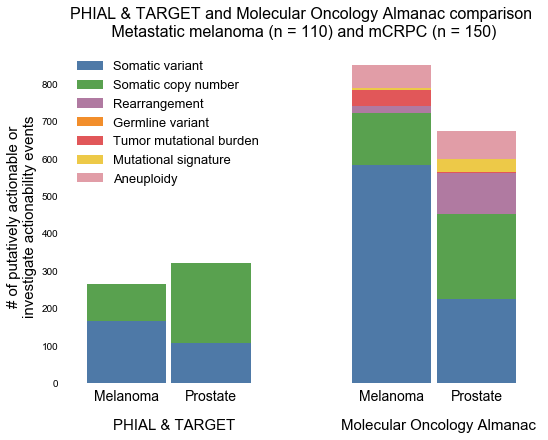

In [11]:
supp_data_mel = vanallen_feature_type_counts
supp_data_mcrpc = robinson_feature_type_counts

fig = plt.figure(figsize = (7.5, 6), constrained_layout=True)
ax = plt.subplot()

remove_spines(ax)
plt.tick_params(axis = 'both', which = 'both',
            top = False, bottom = False, right = False, left = False, 
            labeltop = False, labelbottom = True, labelright = False, labelleft = True)

dtype_color_map = {
    'Somatic variant': tableau10['blue'],
    'Somatic copy number': tableau10['green'],
    'Rearrangement': tableau10['purple'],
    'Germline variant': tableau10['orange'],
    'Tumor mutational burden': tableau10['red'],
    'Mutational signature': tableau10['yellow'],
    'Aneuploidy': tableau10['pink']
}

width = 0.3

mel_phial = 0
mel_almanac = 0
su2c_phial = 0
su2c_almanac = 0
for column in supp_data_mel.columns:
    value = supp_data_mel.loc['PHIAL/TARGET', column]
    plt.bar(0.84, value, width, color=dtype_color_map[column], align='center', bottom=mel_phial, label=column)
    mel_phial += value 
    
    value = supp_data_mcrpc.loc['PHIAL/TARGET', column]
    plt.bar(1.16, value, width, color=dtype_color_map[column], align='center', bottom=su2c_phial)
    su2c_phial += value 

    value = supp_data_mel.loc['Molecular Oncology Almanac', column]
    plt.bar(1.84, value, width, color=dtype_color_map[column], align='center', bottom=mel_almanac)
    mel_almanac += value 
    
    value = supp_data_mcrpc.loc['Molecular Oncology Almanac', column]
    plt.bar(2.16, value, width, color=dtype_color_map[column], align='center', bottom=su2c_almanac)
    su2c_almanac += value 
    
plt.ylabel('# of putatively actionable or\ninvestigate actionability events', fontsize = 15)

labels = ['Melanoma', 'Prostate', 'Melanoma', 'Prostate']
ax.set_xticks([0.84, 1.16, 1.84, 2.16])
ax.set_xticklabels(labels, fontsize = 14)


plt.title('PHIAL & TARGET and Molecular Oncology Almanac comparison\n Metastatic melanoma (n = 110) and mCRPC (n = 150)', y = 1.02, fontsize = 16)
plt.legend(loc = 0, ncol = 1, frameon=False, fontsize=13)

plt.text(0.79, -125,'PHIAL & TARGET', fontsize = 15)
plt.text(1.65, -125,'Molecular Oncology Almanac', fontsize = 15)

filename = 'retrospective-cohorts-clinical-events'
for suffix in ['svg', 'png']:
    outname = '../../figures/{}.{}'.format(filename, suffix)
    plt.savefig(outname, format=suffix)

plt.show()